# Análisis Exploratorio del Sector de Telecomunicaciones en Argentina.

## Introducción.

El objetivo de este análisis exploratorio de datos (EDA) es examinar el estado actual del sector de telecomunicaciones en Argentina. A través de la investigación de métricas clave y tendencias, este análisis busca brindar una visión profunda de la estructura, desempeño y desafíos del sector.

Como fuentes de datos se utilizarán tres Datasets de dos fuentes distintas, los cuales se encuentran de la siguiente manera:

*ENACOM:*

- **Internet.xlsx:** Consiste en una serie de tablas con datos relativos al uso de internet en las distintas provincias argentinas.
- **mapa_conectividad.xlsx:** Tabla donde se incluyen todas las provincias, partidos y localidades argentinas con su respectiva población, ubicación geográfica y tipo de tecnologías de telecomunicaciones que se encuentran soportadas.

*OECD:*

- **Broaband.csv:** Total de suscripciones a redes móviles y fijas dentro de los países pertenecientes a la OECD.


## Análisis

Dentro de este análisis exploratorio de datos, realizaremos las transformaciones básicas para poder trabajar con los datasets, así como un breve análisis de como los datos se encuentran distribuidos.

Antes de iniciar con el análisis de cada dataset, primero importamos las librerías que utilizaremos para realizar dicho análisis.

In [2]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

### Internet.xlsx

Este archivo .xlsx consiste en una serie de hojas donde se pueden encontrar datos relativos al uso del servicio de internet en las distintas provincias argentinas.

Para este analisis solo utilizaremos las siguientes hojas:

- Accesos_tecnologia_localidad
- Totales Accesos Por Tecnologia
- Penetración-poblacion
- Penetracion-totales
- Ingresos


Primero cargaremos la primera hoja “Accesos_tecnologia_localidad” en un dataframe.

In [3]:
accesos_tecnologia = pd.read_excel("../assets/Internet.xlsx", sheet_name="Accesos_tecnologia_localidad")
accesos_tecnologia.head()

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,ADSL,6854100,755.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,CABLEMODEM,6854100,4600.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,FIBRA OPTICA,6854100,2.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,SATELITAL,6854100,742.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,WIRELESS,6854100,727.0


Eliminamos la columna Link Indec ya que no es necesaria para nuestro análisis

In [4]:
accesos_tecnologia.drop("Link Indec", axis=1, inplace=True)

In [5]:
accesos_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Accesos     7747 non-null   float64
dtypes: float64(1), object(4)
memory usage: 303.0+ KB


Como podemos observar la columna Accesos tiene valores nulos, al ser una columna de valores flotantes podemos cambiar los valores nulos por 0.


In [6]:
accesos_tecnologia["Accesos"].fillna(0, inplace=True)
accesos_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Accesos     7753 non-null   float64
dtypes: float64(1), object(4)
memory usage: 303.0+ KB


Dentro de nuestro dataset tenemos 4 columnas que cuentan con variables de texto, para evitar que existan varias etiquetas que representen el mismo valor pero que se tengan escritas de distinta forma, analizaremos los valores únicos de dichas columnas.

In [7]:
accesos_tecnologia.Provincia.unique()

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

In [8]:
accesos_tecnologia.Partido.unique()

array(['25 de Mayo', '9 de Julio', 'Adolfo Alsina',
       'Adolfo Gonzales Chaves', 'Alberti', 'Almirante Brown', 'AMBA',
       'Arrecifes', 'Avellaneda', 'Ayacucho', 'Azul', 'Bahía Blanca',
       'Balcarce', 'Baradero', 'Benito Juárez', 'Berazategui', 'Berisso',
       'Bolívar', 'Bragado', 'Brandsen', 'Campana', 'Cañuelas',
       'Capitán Sarmiento', 'Carlos Casares', 'Carlos Tejedor',
       'Carmen de Areco', 'Castelli', 'Chacabuco', 'Chascomús',
       'Chivilcoy', 'Colón', 'Coronel de Marina L. Rosales',
       'Coronel Dorrego', 'Coronel Pringles', 'Coronel Suárez',
       'Daireaux', 'Dolores', 'Ensenada', 'Escobar', 'Esteban Echeverría',
       'Exaltación de la Cruz', 'Ezeiza', 'Florencio Varela',
       'Florentino Ameghino', 'General Alvarado', 'General Arenales',
       'General Belgrano', 'General Guido', 'General Juan Madariaga',
       'General La Madrid', 'General Las Heras', 'General Lavalle',
       'General Paz', 'General Pinto', 'General Pueyrredón',
       'Ge

In [9]:
accesos_tecnologia.Localidad.unique()

array(['25 de Mayo', 'Del Valle', 'Ernestina', ..., 'Villa  de Trancas',
       'Villa Carmela', 'Yerba Buena - Marcos Paz'], dtype=object)

In [10]:
accesos_tecnologia.Tecnologia.unique()

array(['ADSL', 'CABLEMODEM', 'FIBRA OPTICA', 'SATELITAL', 'WIRELESS',
       'Otros', 'DIAL UP', 'OTROS', 'WIMAX', 'Cablemodem'], dtype=object)

Como podemos observar las columnas partido y localidad cuentan con muchos valores únicos por lo cual las excluimos de este paso.

Dentro de la columna Provincia podemos observar que no existe algún valor que se esté repitiendo, como si es en el caso de la columna Tecnología, donde *OTROS & CABLEMODEM* tienen valores con minúsculas.

Lo que haremos sera reemplazar los valores que se encuentran en minusculas a mayusculas, para estandarizar todos los valores.

In [11]:
accesos_tecnologia["Tecnologia"] = accesos_tecnologia["Tecnologia"].replace({"Cablemodem": "CABLEMODEM", "Otros": "OTROS"})
accesos_tecnologia.Tecnologia.unique()

array(['ADSL', 'CABLEMODEM', 'FIBRA OPTICA', 'SATELITAL', 'WIRELESS',
       'OTROS', 'DIAL UP', 'WIMAX'], dtype=object)

Ahora se requiere analizar cómo se encuentran distribuidos los valores de Accesos, esto para poder validar si los datos tienen alguna distribución en particular.

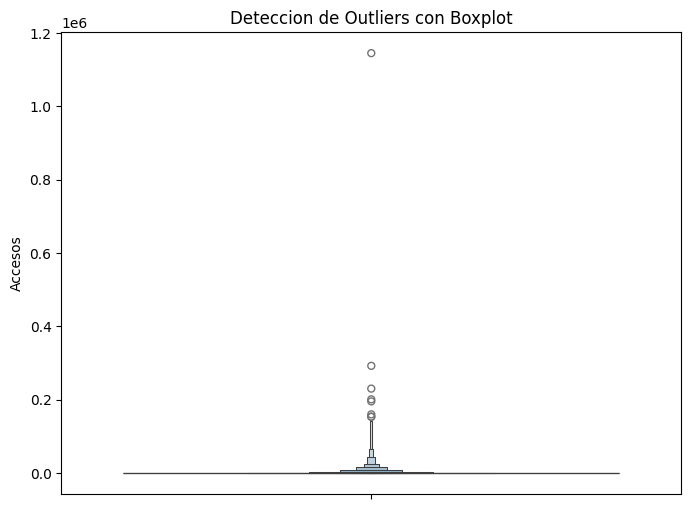

In [12]:
plt.figure(figsize=(8,6))
sns.boxenplot(data=accesos_tecnologia, y='Accesos')
plt.title("Deteccion de Outliers con Boxplot")
plt.show()

Como podemos observar en la gráfica existe un valor que sobrepasa la distribución de los datos, con fines demostrativos tomaremos este dato como un outlier.

Para tomar de una forma más arbitraria los datos que son outliers, utilizaremos el Z-score. Este algoritmo estandariza los datos de acuerdo a cuántas desviaciones estándar se encuentran, para este caso utilizaremos -3 y +3 desviaciones estándar. 


In [13]:
df_outliers = accesos_tecnologia
df_outliers["z_score"] = zscore(df_outliers["Accesos"])
df_sin_outliers = df_outliers[(df_outliers["z_score"] > -3) & (df_outliers["z_score"] < 3)]


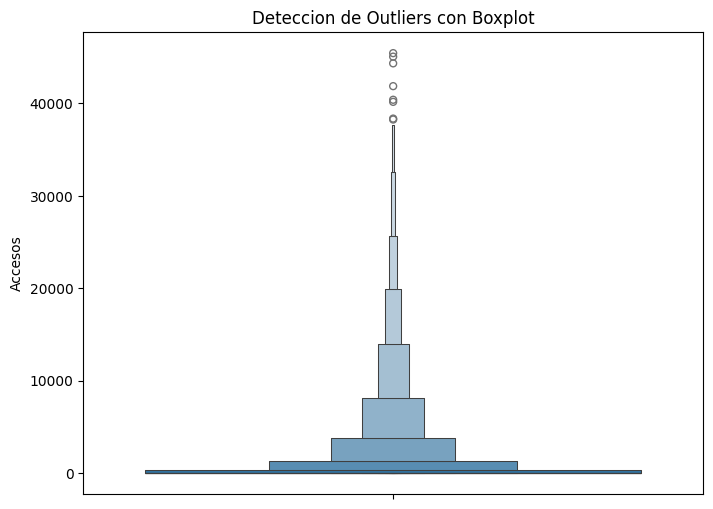

In [14]:
plt.figure(figsize=(8,6))
sns.boxenplot(data=df_sin_outliers, y='Accesos')
plt.title("Deteccion de Outliers con Boxplot")
plt.show()

Ahora podemos apreciar que, eliminando los outliers, nuestra distribución de valores es más consistente.

Realizadas estas transformaciones ahora podemos tener una mejor perspectiva de cómo se encuentra nuestro dataframe

Como primer análisis podemos evaluar qué provincia cuenta con más accesos.

Por lo que primero procederemos a agrupar nuestros datos por provincia, sumando todos los accesos.


In [15]:
df_provicia = accesos_tecnologia.drop(['Partido','Localidad', 'z_score'], axis=1).groupby(['Provincia']).sum()

Para tener una mejor apreciación de los datos ordenaremos nuestro dataframe en base a la cantidad de accesos.

In [16]:
df_provicia = df_provicia.sort_values(by=["Accesos"], ascending=False)

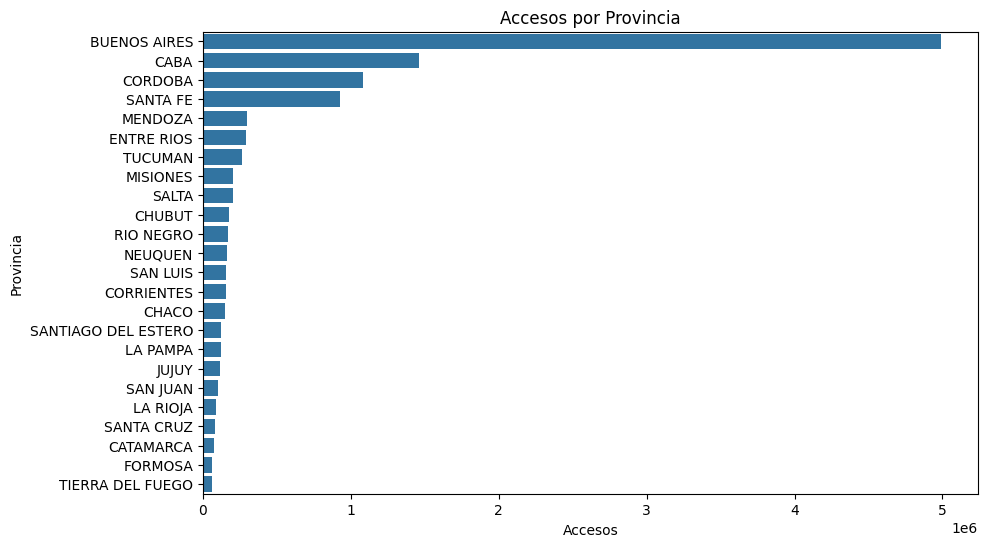

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_provicia, x="Accesos", y="Provincia")
plt.title("Accesos por Provincia")
plt.show()

Como podemos observar en el gráfico, la provincia de Buenos Aires es la que mayor número de accesos tiene con casi 5 Millones, por otro lado las provincias de Caba, Córdoba y Santa fe son las que superan el millón de accesos, y el resto de las provincias no sobrepasan los 500 mil accesos.

En este gráfico se puede deducir que la mayoría de las provincias argentinas cuentan con muy pocos accesos en comparación de las cuatro antes mencionadas, derivado de esto es necesario analizar el total de población de estas provincias para así comprobar si este fenómeno se debe a la densidad de población o existe una brecha tecnológica muy grande entre las provincias argentinas.


Ahora procederemos a analizar cuál es el tipo de tecnología más usado para el acceso a internet en las provincias argentinas.

Justo como se realizó en el análisis anterior, se agruparon los datos en base a la tecnología y se ordenaron de forma descendente.


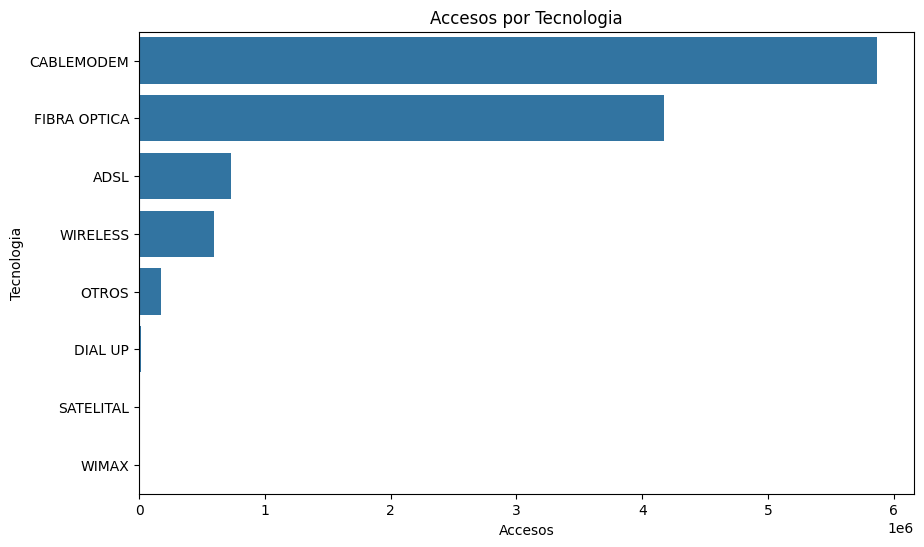

In [18]:
df_tecnologia = accesos_tecnologia.drop(['Partido','Localidad', 'Provincia'], axis=1).groupby(['Tecnologia']).sum()
df_tecnologia = df_tecnologia.sort_values(by=["Accesos"], ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_tecnologia, x="Accesos", y="Tecnologia")
plt.title("Accesos por Tecnologia")
plt.show()


De Acuerdo a la gráfica anterior, podemos analizar que la tecnología más usada es CABLEMODEM, seguida de la FIBRA ÓPTICA.

Con esta gráfica se podría buscar analizar cuál es el costo de estas dos tecnologías y buscar deducir si estas tecnologías son más usadas debido a su precio o buscar otros factores como lo son tiempos de despliegue de nuevos servicios.


Ahora procederemos a cargar la hoja "Totales Accesos Por Tecnología" de Internet.xlsx

In [19]:
total_accesos = pd.read_excel("../assets/Internet.xlsx", sheet_name="Totales Accesos Por Tecnología")
total_accesos.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


En este caso eliminaremos las columnas *Total* y *Periodo*, ya que son datos redundantes que podemos calcular con las demás columnas y ocupan espacio de almacenamiento.

In [20]:
total_accesos.drop(["Total", "Periodo"], axis=1, inplace=True)
total_accesos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Año           42 non-null     int64
 1   Trimestre     42 non-null     int64
 2   ADSL          42 non-null     int64
 3   Cablemodem    42 non-null     int64
 4   Fibra óptica  42 non-null     int64
 5   Wireless      42 non-null     int64
 6   Otros         42 non-null     int64
dtypes: int64(7)
memory usage: 2.4 KB


Como podemos observar este dataframe no contiene datos nulos ni columnas categóricas donde pudieran existir algún error en los valores, tal como fue el caso del dataframe anterior.

Este dataframe consiste en cómo han variado la cantidad de accesos en las distintas tecnologías, la mejor manera de representar estos datos en una gráfica es utilizando una gráfica de líneas, sin embargo el formato que actualmente cuenta el dataframe no nos permite graficar óptimamente, es por eso que realizaremos algunos cambios en la estructura del dataframe.

Actualmente el dataframe cuenta con una estructura **wide**, que es más amigable para un análisis en modo tabla, pero como requerimos graficar estos datos es necesario utilizar un formato **long**.

Lo primero que haremos será unir las columnas año y trimestre en una columna fecha para posteriormente trabajar más fácilmente.


Cambiamos el formato de las columnas de **int** a **string** para poder manipularlas más fácilmente.

In [21]:
total_accesos['Año'] = total_accesos['Año'].astype(str)
total_accesos['Trimestre'] = total_accesos['Trimestre'].astype(str)

Concatenamos las dos columnas en una nueva y eliminamos las columnas independientes.

In [22]:
total_accesos['Trimestre'] = total_accesos['Trimestre'].replace({"1": "Q1", "2": "Q2", "3": "Q3", "4": "Q4"})
total_accesos['Fecha'] = total_accesos['Año'].str.cat(total_accesos['Trimestre'], sep="-")
total_accesos.drop(["Año", "Trimestre"], axis=1, inplace=True)

Ordenamos los valores de forma ascendente.

In [23]:
total_accesos = total_accesos.sort_values(by=["Fecha"])

Usamos la función de pandas para convertir una dataframe wide en long.

In [24]:
df_long = pd.melt(total_accesos, id_vars="Fecha", value_vars=["ADSL","Cablemodem","Fibra óptica","Wireless","Otros"], var_name="Tecnologia", value_name="Accesos")


Ahora con estas transformaciones ya podemos graficar nuestro dataframe.

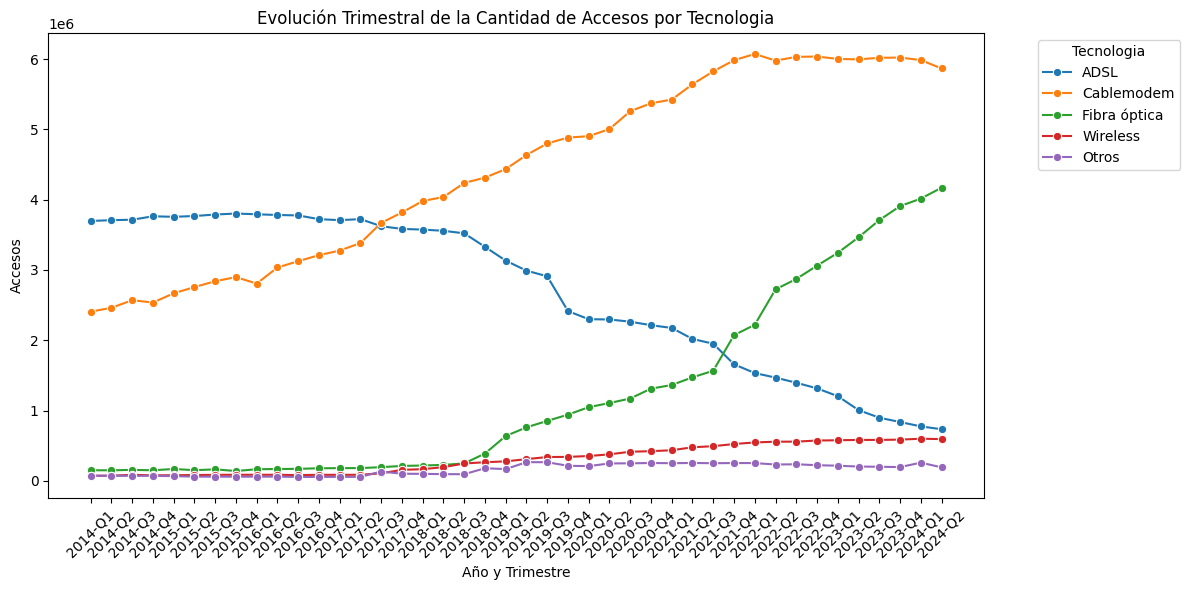

In [25]:
plt.figure(figsize=(12, 6))

# Graficar con hue para diferenciar cada variable
sns.lineplot(data=df_long, x="Fecha", y="Accesos", hue="Tecnologia", marker="o")

# Etiquetas y título
plt.title("Evolución Trimestral de la Cantidad de Accesos por Tecnologia")
plt.xlabel("Año y Trimestre")
plt.ylabel("Accesos")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.legend(title="Tecnologia", bbox_to_anchor=(1.05, 1), loc="upper left")  # Posicionar la leyenda fuera del gráfico
plt.tight_layout()
plt.show()

Como podemos apreciar en esta gráfica, el uso de *Cablemodem* es la tecnología de acceso a internet más popular desde el segundo Trimestre del 2017, a su vez otro punto importante a destacar es como el *ADSL* ha dejado de ser usado para nuevos accesos desde ese mismo trimestre y su uso ha ido disminuyendo paulatinamente a lo largo de los trimestres.

Un último punto que podemos apreciar desde el cuarto trimestre del 2021, la *Fibra óptica* ha ido en aumento y el *Cablemodem* no registra grandes cambios en la cantidad de nuevos accesos, por lo que podríamos deducir que la *Fibra óptica* podría llegar a ser la nueva tecnologia mas usada en los próximos años y el *Cablemodem* empezaría a dejar de ser usado como ha sucedido con el *ADSL*.

El siguiente dataset que analizaremos es “Penetración-población”, el cual consiste en una distribución en el tiempo de los accesos a internet por cada 100 habitantes.

Como este dataset es muy similar estructuralmente hablando al pasado, realizaremos las transformaciones en un solo paso y lo graficamos para desarrollar las conclusiones.


In [26]:
penetracion_poblacion = pd.read_excel("../assets/Internet.xlsx", sheet_name="Penetración-poblacion")
penetracion_poblacion['Año'] = penetracion_poblacion['Año'].astype(str)
penetracion_poblacion['Trimestre'] = penetracion_poblacion['Trimestre'].astype(str)
penetracion_poblacion['Trimestre'] = penetracion_poblacion['Trimestre'].replace({"1": "Q1", "2": "Q2", "3": "Q3", "4": "Q4"})
penetracion_poblacion['Fecha'] = penetracion_poblacion['Año'].str.cat(penetracion_poblacion['Trimestre'], sep="-")
penetracion_poblacion.drop(["Año", "Trimestre"], axis=1, inplace=True)
penetracion_poblacion = penetracion_poblacion.sort_values(by=["Fecha"])
penetracion_poblacion.head()

,Provincia,Accesos por cada 100 hab,Fecha
999,Río Negro,13.867842,2014-Q1
984,Buenos Aires,16.692346,2014-Q1
985,Capital Federal,42.655072,2014-Q1
986,Catamarca,6.184615,2014-Q1
987,Chaco,5.553671,2014-Q1


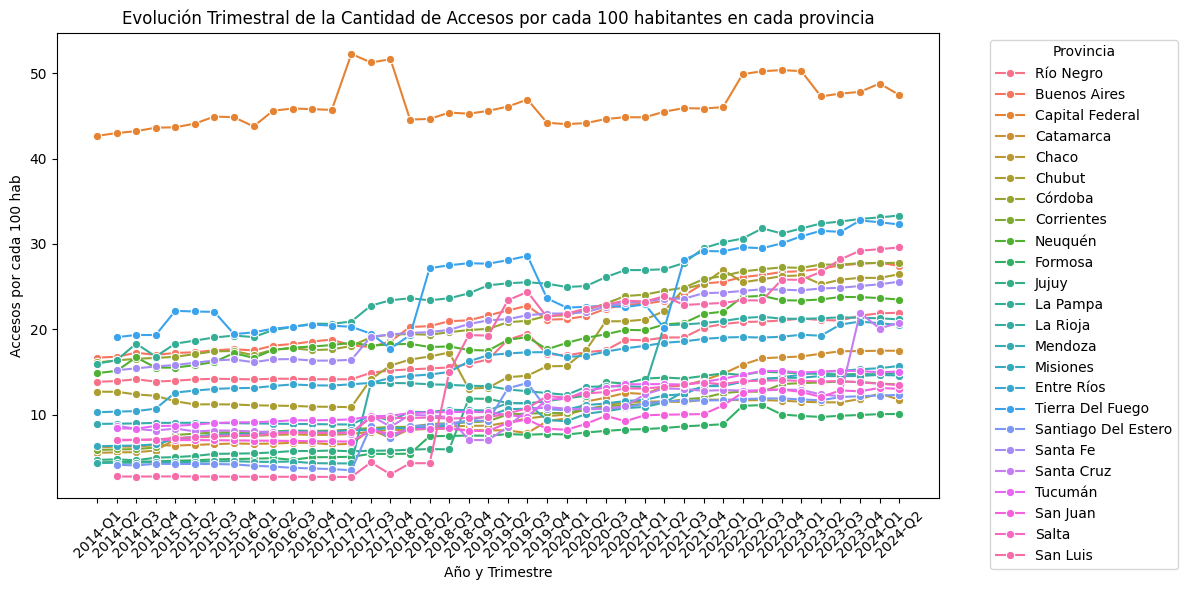

In [27]:
plt.figure(figsize=(12, 6))

# Graficar con hue para diferenciar cada variable
sns.lineplot(data=penetracion_poblacion, x="Fecha", y="Accesos por cada 100 hab", hue="Provincia", marker="o")

# Etiquetas y título
plt.title("Evolución Trimestral de la Cantidad de Accesos por cada 100 habitantes en cada provincia")
plt.xlabel("Año y Trimestre")
plt.ylabel("Accesos por cada 100 hab")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.legend(title="Provincia", bbox_to_anchor=(1.05, 1), loc="upper left")  # Posicionar la leyenda fuera del gráfico
plt.tight_layout()
plt.show()

Como podemos observar en la gráfica no nos permite tener un claro análisis debido a la saturación de las provincias en un solo gráfico, por lo que procederemos a tomar solo las provincias de Buenos Aires, Córdoba, Entre Ríos, Mendoza y Santa Fe.

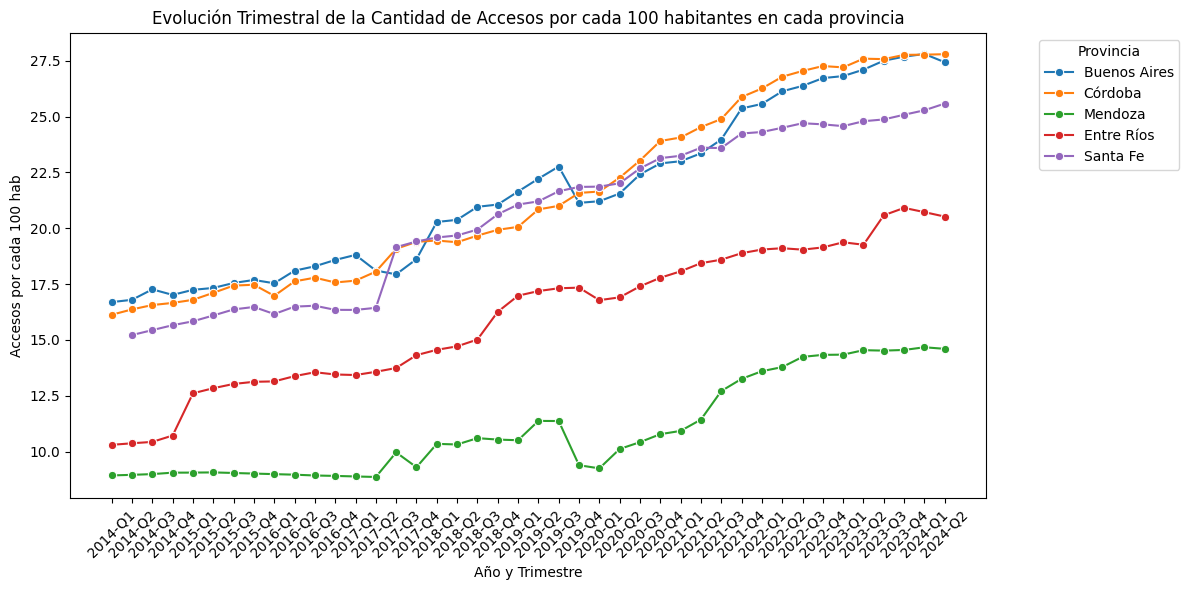

In [28]:
df_filtro_provincias = penetracion_poblacion[penetracion_poblacion["Provincia"].isin(["Buenos Aires","Córdoba","Entre Ríos","Mendoza","Santa Fe"])]

plt.figure(figsize=(12, 6))

# Graficar con hue para diferenciar cada variable
sns.lineplot(data=df_filtro_provincias, x="Fecha", y="Accesos por cada 100 hab", hue="Provincia", marker="o")

# Etiquetas y título
plt.title("Evolución Trimestral de la Cantidad de Accesos por cada 100 habitantes en cada provincia")
plt.xlabel("Año y Trimestre")
plt.ylabel("Accesos por cada 100 hab")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.legend(title="Provincia", bbox_to_anchor=(1.05, 1), loc="upper left")  # Posicionar la leyenda fuera del gráfico
plt.tight_layout()
plt.show()

Ahora con un gráfico más limpio, podemos observar que en las cuatro provincias escogidas ha existido un aumento en en la cantidad de accesos a través de los años, sin embargo podemos observar que en las provincias más grandes la cantidad de accesos por cada 100 habitantes ha sido muy similar, pero en provincias más pequeñas se tiene una brecha más grande en la cantidad de dichos accesos a internet.

El siguiente dataset que analizaremos es “Penetración-total”, el cual consiste en una distribución en el tiempo de los accesos a internet por cada 100 habitantes.

Como este dataset es muy similar estructuralmente hablando al los pasados, realizaremos las transformaciones en un solo paso y lo graficamos para desarrollar las conclusiones.

In [29]:
penetracion_total = pd.read_excel("../assets/Internet.xlsx", sheet_name="Penetracion-totales")
penetracion_total.drop(["Periodo", "Accesos por cada 100 hogares"], axis=1, inplace=True)
penetracion_total['Año'] = penetracion_total['Año'].astype(str)
penetracion_total['Trimestre'] = penetracion_total['Trimestre'].astype(str)
penetracion_total['Trimestre'] = penetracion_total['Trimestre'].replace({"1": "Q1", "2": "Q2", "3": "Q3", "4": "Q4"})
penetracion_total['Fecha'] = penetracion_total['Año'].str.cat(penetracion_total['Trimestre'], sep="-")
penetracion_total.drop(["Año", "Trimestre"], axis=1, inplace=True)
penetracion_total = penetracion_total.sort_values(by=["Fecha"])
penetracion_total.head()

,Accesos por cada 100 hab,Fecha
41,15.050104,2014-Q1
40,15.163908,2014-Q2
39,15.428769,2014-Q3
38,15.394677,2014-Q4
37,15.677234,2015-Q1


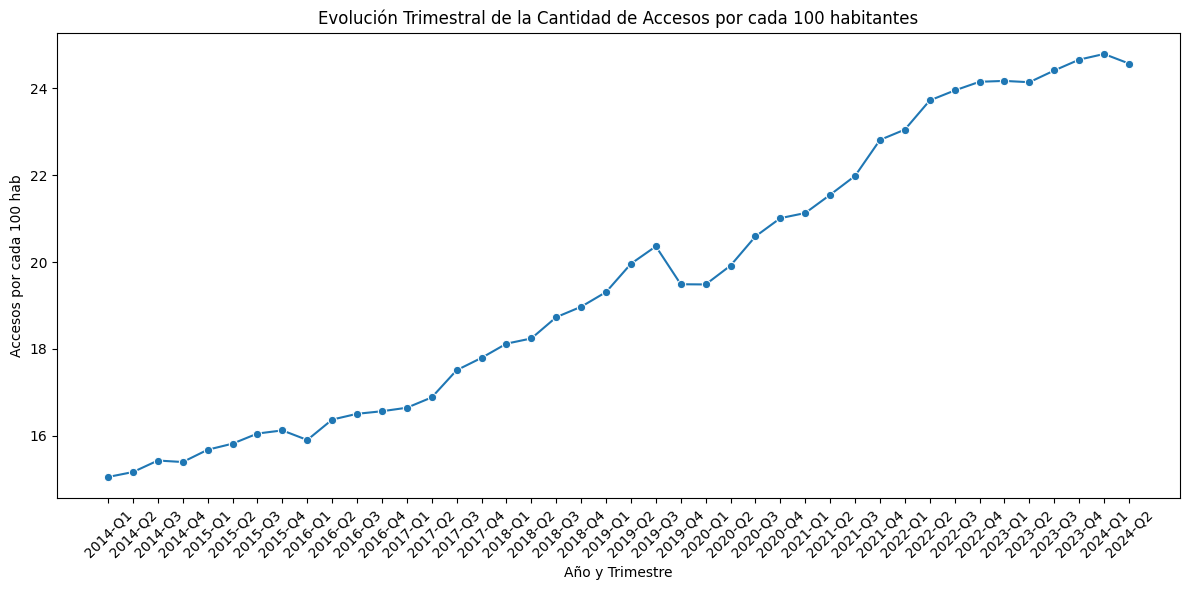

In [30]:
plt.figure(figsize=(12, 6))

# Graficar con hue para diferenciar cada variable
sns.lineplot(data=penetracion_total, x="Fecha", y="Accesos por cada 100 hab", marker="o")

# Etiquetas y título
plt.title("Evolución Trimestral de la Cantidad de Accesos por cada 100 habitantes")
plt.xlabel("Año y Trimestre")
plt.ylabel("Accesos por cada 100 hab")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

En este gráfico podemos apreciar que ha existido mayoritariamente un crecimiento constante en el número de accesos por cada 100 habitantes en los últimos años, a excepción del cuarto trimestre del 2014 y el tercer trimestre del 2019. Para poder identificar los motivos de estos decrementos debemos hacer un análisis a eventos macroeconómicos que pudieron afectar la cantidad de accesos o inclusive a desastres naturales que pudieron afectar la región.

El siguiente dataset que analizaremos es “Ingresos”, el cual consiste en una distribución en el tiempo de los accesos a internet por cada 100 habitantes.

Como este dataset es muy similar estructuralmente hablando al los pasados, realizaremos las transformaciones en un solo paso y lo graficamos para desarrollar las conclusiones.

In [31]:
ingresos_totales = pd.read_excel("../assets/Internet.xlsx", sheet_name="Ingresos ")
ingresos_totales = ingresos_totales.rename(columns={"Ingresos (miles de pesos)": "Ingresos"})
ingresos_totales.drop("Periodo", axis=1, inplace=True)
ingresos_totales['Año'] = ingresos_totales['Año'].astype(str)
ingresos_totales['Trimestre'] = ingresos_totales['Trimestre'].astype(str)
ingresos_totales['Trimestre'] = ingresos_totales['Trimestre'].replace({"1": "Q1", "2": "Q2", "3": "Q3", "4": "Q4"})
ingresos_totales['Fecha'] = ingresos_totales['Año'].str.cat(ingresos_totales['Trimestre'], sep="-")
ingresos_totales.drop(["Año", "Trimestre"], axis=1, inplace=True)
ingresos_totales = ingresos_totales.sort_values(by=["Fecha"])
ingresos_totales.head()

,Ingresos,Fecha
41,2.984054e+06,2014-Q1
40,3.270816e+06,2014-Q2
39,3.478638e+06,2014-Q3
38,3.950441e+06,2014-Q4
37,4.876385e+06,2015-Q1


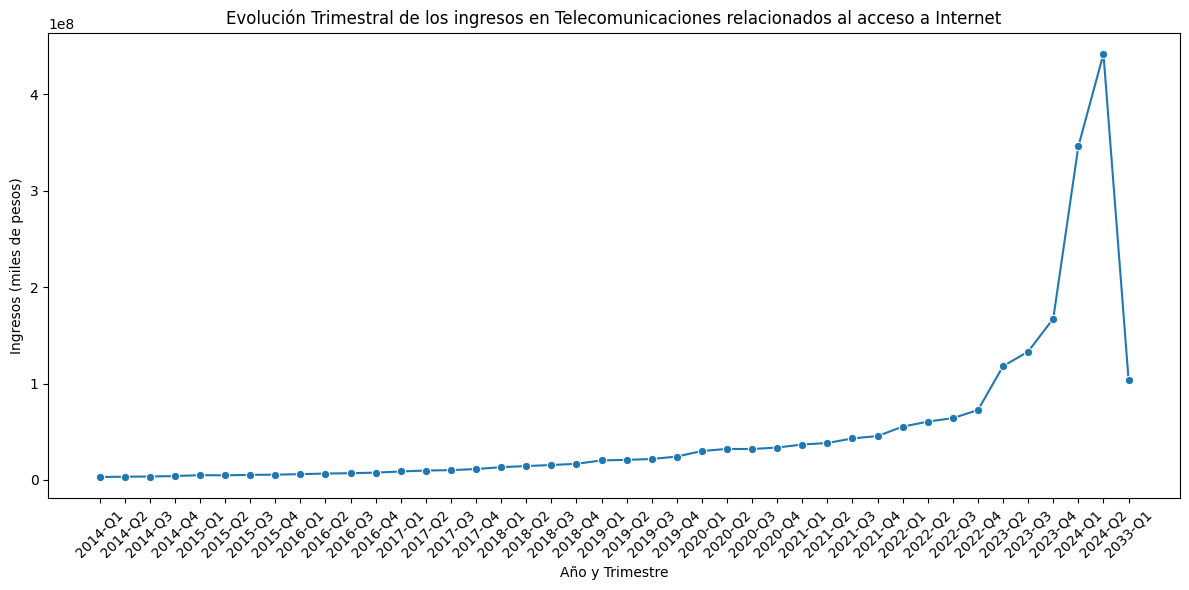

In [32]:
plt.figure(figsize=(12, 6))

# Graficar con hue para diferenciar cada variable
sns.lineplot(data=ingresos_totales, x="Fecha", y="Ingresos", marker="o")

# Etiquetas y título
plt.title("Evolución Trimestral de los ingresos en Telecomunicaciones relacionados al acceso a Internet")
plt.xlabel("Año y Trimestre")
plt.ylabel("Ingresos (miles de pesos)")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

En la grafica podemos ver que existe un error en el ultimo valor “2033-Q1”, por lo que lo ajustaremos a “2023-Q1”

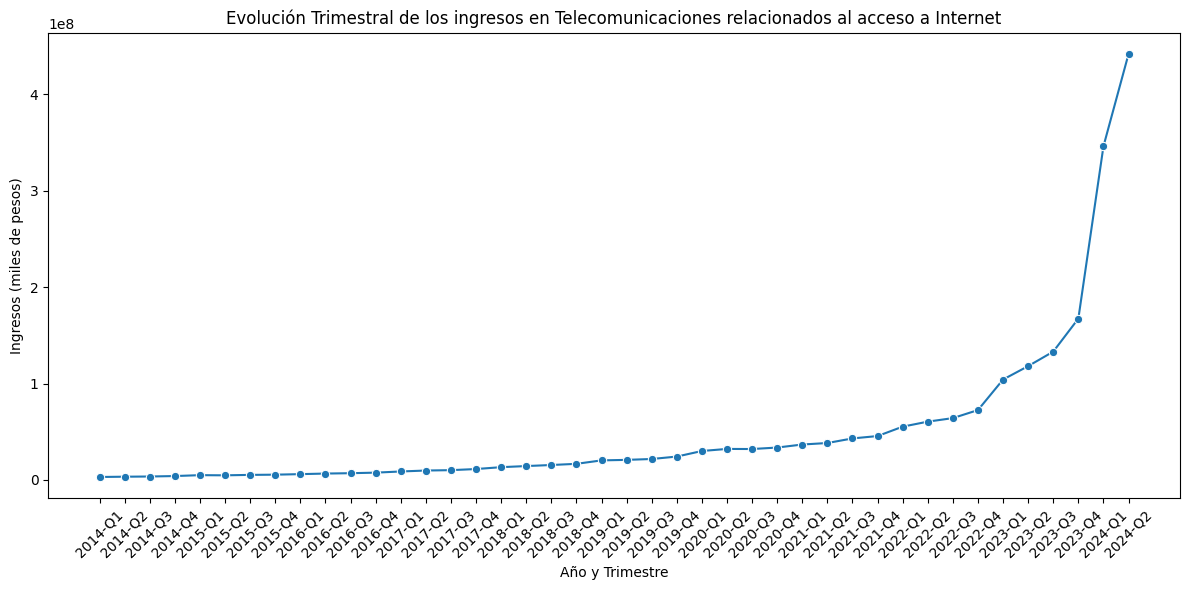

In [33]:
ingresos_totales['Fecha'] = ingresos_totales["Fecha"].replace("2033-Q1","2023-Q1")
ingresos_totales = ingresos_totales.sort_values(by=["Fecha"])

plt.figure(figsize=(12, 6))

# Graficar con hue para diferenciar cada variable
sns.lineplot(data=ingresos_totales, x="Fecha", y="Ingresos", marker="o")

# Etiquetas y título
plt.title("Evolución Trimestral de los ingresos en Telecomunicaciones relacionados al acceso a Internet")
plt.xlabel("Año y Trimestre")
plt.ylabel("Ingresos (miles de pesos)")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

Ahora con la gráfica ordenada correctamente, podemos apreciar que el primer trimestre del 2023 ha existido un incremento repentino en los ingresos, pero como hemos visto en gráficas anteriores este cambio tan abrupto no se vio reflejado en aumento de accesos, por lo que habría que investigar si este cambio puede corresponder a algún evento macroeconomico.

### Mapa_conectividad.xlsx

Este archivo .xlsx podemos encontrar, la población, latitud, longitud y que tipo de tecnología para acceso a internet existen en cada localidad argentina. Este dataset servirá, como bien lo dice su nombre, para mapear las localidades.

Primero lo cargaremos en un dataframe para poder manipularlo más fácilmente.

In [34]:
mapa_conectividad = pd.read_excel("../assets/mapa_conectividad.xlsx")
mapa_conectividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4305 non-null   object 
 1   Partido         4305 non-null   object 
 2   Localidad       4305 non-null   object 
 3   Población       4305 non-null   int64  
 4   ADSL            4305 non-null   object 
 5   Cablemódem      4305 non-null   object 
 6   Dial Up         4305 non-null   object 
 7   Fibra óptica    4305 non-null   object 
 8   Satelital       4305 non-null   object 
 9   Wireless        4305 non-null   object 
 10  Telefonía Fija  4305 non-null   object 
 11  3G              4305 non-null   object 
 12  4G              4305 non-null   object 
 13  Link            4293 non-null   float64
 14  Latitud         4305 non-null   float64
 15  Longitud        4305 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 538.2+ KB


Eliminaremos la columna “Link”, ya que no nos es de gran ayuda.

In [35]:
mapa_conectividad.drop("Link", axis=1, inplace=True)
mapa_conectividad.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,SI,SI,--,--,SI,SI,SI,SI,SI,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,280,--,--,--,--,--,--,SI,--,--,-35.739217,-60.559063
2,BUENOS AIRES,25 de Mayo,Del Valle,899,SI,--,--,--,SI,--,--,SI,--,-35.897345,-60.731609
3,BUENOS AIRES,25 de Mayo,Ernestina,145,SI,--,--,--,--,--,SI,--,--,-35.270234,-59.557503
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,547,--,--,--,--,--,SI,--,--,--,-35.164397,-60.081358


Ahora cambiaremos cómo se tiene almacenado si una localidad cuenta o no con una tecnología.

Actualmente se utiliza “SI” cuando la tecnología existe en dicha localidad y “--” cuando no, esto es amigable para un análisis en tabla pero si requerimos complementar algún gráfico, este formato no es de mucha ayuda, por lo que, cambiaremos el formato a True o False.


In [36]:
lista_tecnologias = ["ADSL","Cablemódem","Dial Up","Fibra óptica","Satelital","Wireless","Telefonía Fija","3G","4G"]
mapa_conectividad[lista_tecnologias] = mapa_conectividad[lista_tecnologias].replace({"SI": True, "--": False})
mapa_conectividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4305 non-null   object 
 1   Partido         4305 non-null   object 
 2   Localidad       4305 non-null   object 
 3   Población       4305 non-null   int64  
 4   ADSL            4305 non-null   bool   
 5   Cablemódem      4305 non-null   bool   
 6   Dial Up         4305 non-null   bool   
 7   Fibra óptica    4305 non-null   bool   
 8   Satelital       4305 non-null   bool   
 9   Wireless        4305 non-null   bool   
 10  Telefonía Fija  4305 non-null   bool   
 11  3G              4305 non-null   bool   
 12  4G              4305 non-null   bool   
 13  Latitud         4305 non-null   float64
 14  Longitud        4305 non-null   float64
dtypes: bool(9), float64(2), int64(1), object(3)
memory usage: 239.8+ KB


Como ya se mencionó anteriormente, este dataset solo se utilizará como apoyo, por lo que no se graficara. Para tener un acceso más fácil a este dataframe se ordenarán las localidades de acuerdo a su densidad de población.

In [37]:
mapa_conectividad = mapa_conectividad.sort_values(by=["Población"], ascending=False)
mapa_conectividad.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Latitud,Longitud
2582,CORDOBA,Capital,Córdoba,1317298,True,True,True,True,True,True,True,True,True,-31.413817,-64.183338
3850,SANTA FE,Rosario,Rosario,948312,True,True,True,True,True,True,True,True,True,-32.953814,-60.651538
3591,BUENOS AIRES,General Pueyrredón,Mar del Plata,560913,True,True,True,True,True,True,True,True,True,-38.012091,-57.606495
358,TUCUMAN,Capital,San Miguel de Tucumán (Est. Tucumán),548866,True,True,True,True,True,True,True,True,True,-26.829010,-65.210544
1123,SALTA,Capital,Salta,520683,True,True,True,True,True,True,True,True,True,-24.782377,-65.414133


### Broadband.csv

Este CSV se obtuvo desde el Data Explorer de la Organización para la Cooperación y el Desarrollo Económico (OCDE) y contiene la cantidad de accesos a internet totales y por cada 100 habitantes de los países que pertenecen a esta organización. 

Como primer paso cargaremos este csv a pandas para poder manipularlo más fácilmente.

In [38]:
broadband = pd.read_csv("../assets/Broadband.csv")
broadband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STRUCTURE                 468 non-null    object 
 1   STRUCTURE_ID              468 non-null    object 
 2   STRUCTURE_NAME            468 non-null    object 
 3   ACTION                    468 non-null    object 
 4   REF_AREA                  468 non-null    object 
 5   Reference area            468 non-null    object 
 6   FREQ                      468 non-null    object 
 7   Frequency of observation  468 non-null    object 
 8   INDICATOR_TYPE            468 non-null    object 
 9   Indicator type            468 non-null    object 
 10  MEASURE                   468 non-null    object 
 11  Measure                   468 non-null    object 
 12  UNIT_MEASURE              468 non-null    object 
 13  Unit of measure           468 non-null    object 
 14  TIME_PERIO

Como podemos apreciar, este dataframe contiene demasiadas columnas que no son de utilidad, por lo que procederemos a eliminarlas.

In [ ]:
lista_columnas = ["REF_AREA","Reference area","INDICATOR_TYPE","UNIT_MEASURE","TIME_PERIOD","OBS_VALUE"]
broadband = broadband[lista_columnas]
broadband.info()

,REF_AREA,Reference area,INDICATOR_TYPE,UNIT_MEASURE,TIME_PERIOD,OBS_VALUE
0,SVN,Slovenia,MBB,SB,2022-Q4,2035253.0
1,AUT,Austria,FBB,SB,2022-Q4,2621237.0
2,AUT,Austria,MBB,SB,2023-Q4,11445310.0
3,AUT,Austria,FBB,SB,2023-Q4,2678412.0
4,AUT,Austria,MBB,SB,2023-Q2,11338719.0


Dentro de este dataframe podemos encontrar la cantidad de accesos móviles de cada país, como en este análisis no estamos incluyendo dichos accesos los removemos de nuestro dataframe.

In [40]:
broadband = broadband[broadband["INDICATOR_TYPE"] != "MBB"]
broadband = broadband[broadband["UNIT_MEASURE"] != "SB"]
broadband.drop(["INDICATOR_TYPE","UNIT_MEASURE"], axis=1, inplace=True)
broadband.head()

,REF_AREA,Reference area,TIME_PERIOD,OBS_VALUE
233,SVN,Slovenia,2022-Q4,31.893
236,AUT,Austria,2023-Q4,29.327
238,AUS,Australia,2023-Q2,35.096
239,AUS,Australia,2022-Q4,35.162
241,AUS,Australia,2023-Q4,34.377


Ahora ordenaremos de forma descendente de acuerdo a la fecha.

In [41]:
broadband = broadband.sort_values(by=["TIME_PERIOD"], ascending=False)
broadband.head()

,REF_AREA,Reference area,TIME_PERIOD,OBS_VALUE
327,POL,Poland,2023-Q4,25.171
275,DEU,Germany,2023-Q4,45.398
283,FIN,Finland,2023-Q4,35.485
343,NLD,Netherlands,2023-Q4,43.828
291,EST,Estonia,2023-Q4,37.785


Actualmente el nombre de las columnas no ayuda a identificar a qué corresponde cada una, por lo que las nombraremos apropiadamente.

In [42]:
nuevos_nombres = ["Codigo","País","Fecha","Accesos por cada 100 hab"]

broadband.columns = nuevos_nombres
broadband.head()

,Codigo,País,Fecha,Accesos por cada 100 hab
327,POL,Poland,2023-Q4,25.171
275,DEU,Germany,2023-Q4,45.398
283,FIN,Finland,2023-Q4,35.485
343,NLD,Netherlands,2023-Q4,43.828
291,EST,Estonia,2023-Q4,37.785


Ahora agregaremos los datos de **penetración total** de los correspondientes trimestres para realizar la comparación del sector de telecomunicaciones con otros países de latinoamerica.

Primero seleccionamos los trimestres correspondientes y agregamos las columnas faltantes.

In [ ]:
broadband_argentina = penetracion_total.loc[[6,4,2]]
broadband_argentina['Codigo'] = "ARG"
broadband_argentina['País'] = "Argentina"

Ahora concatenamos los dos dataframes y lo volveremos a ordenar de forma descendente.

In [ ]:
broadband_combinado = pd.concat([broadband, broadband_argentina], ignore_index=True)
broadband_combinado = broadband_combinado.sort_values(by=["Fecha"], ascending=False)
broadband_combinado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 89
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Codigo                    120 non-null    object 
 1   País                      120 non-null    object 
 2   Fecha                     120 non-null    object 
 3   Accesos por cada 100 hab  120 non-null    float64
dtypes: float64(1), object(3)
memory usage: 4.7+ KB


Por último seleccionamos los países a comparar y graficamos.

In [57]:
lista_paises = ["OECD","Chile","Colombia","Costa Rica","Mexico","Argentina"]
broadband_latinoamerica = broadband_combinado[broadband_combinado['País'].isin(lista_paises)]

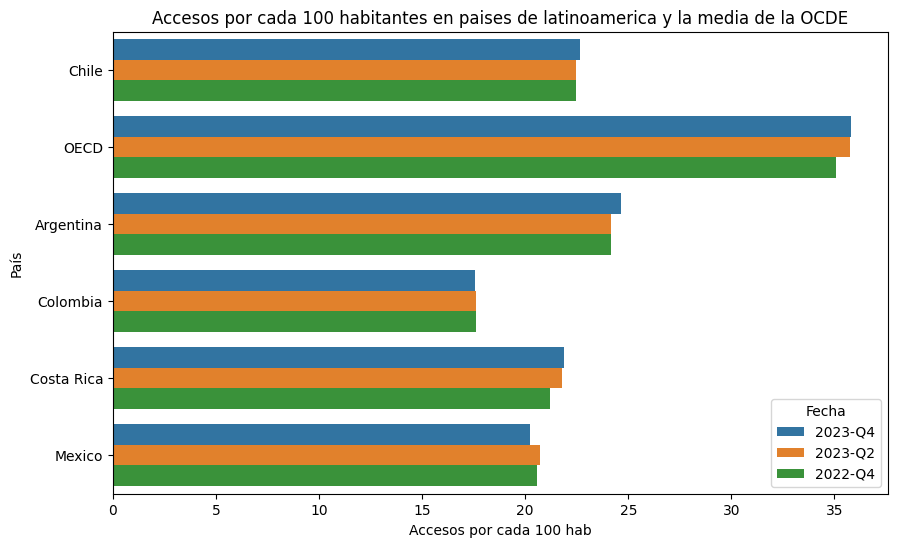

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(data=broadband_latinoamerica, x="Accesos por cada 100 hab", y="País", hue='Fecha')
plt.title("Accesos por cada 100 habitantes en paises de latinoamerica y la media de la OCDE")
plt.show()

Como podemos observar en este gráfico la cantidad de accesos por cada 100 habitantes en Argentina sobrepasa ligeramente la cantidad de accesos de los países latinoamericanos pertenecientes al OCDE, pero aun se encuentra muy por debajo de la media de la OCDE.

## KPIs

De acuerdo a los datos previamente analizados se presentan tres KPIs que ayudarán a medir de una forma SMART el avance del sector de telecomunicaciones en Argentina.

**1. Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 habitante, por provincia.**

*KPI = ((NuevoAcceso - AccesoActual) / AccesoActual) * 100*

Donde:

- **Nuevo acceso** se refiere al número de habitantes con acceso a Internet después del próximo trimestre.
- **Acceso actual** se refiere al número de habitantes con acceso a Internet en el trimestre actual.

**2. Superar en un 15% los accesos al servicio de internet por cada 100 habitantes, con respecto a la media de la OCDE en cada trimestre.**

*KPI = ((MediaOCDE - AccesoActual) / AccesoActual) * 100*

Donde:

- **MediaOCDE** se refiere a al media del número de habitantes con acceso a Internet de los paises dentro de la OCDE de cada trimestre.
- **Acceso actual** se refiere al número de habitantes con acceso a Internet en el trimestre actual.

**3. Migrar en un 0.2% trimestral, los accesos a Internet con tecnologia de cobre a Fibra Optica.**

*KPI = (AccesosCobreAnterior - AccesosCobre) / (AccesosCobre + AccesosFibra) * 100*

Donde:

- **AccesosCobreAnterior** se refiere a la cantidad de accesos a internet con tecnologias ADSL y Cablemodem del trimestre anterior.
- **AccesosCobre** se refiere a la cantidad de accesos a internet con tecnologias ADSL y Cablemodem del trimestre actual.
- **AccesosFibra** se refiere a la cantidad de accesos a internet con Fibra optica del trimestre aactual.